In [ ]:
# naive bayes only for classificatoin
#unsupervised, dimensionally reduction

In [ ]:
#PCA
#LDA return one column

In [ ]:
# dimension reduction
# feature reduction 1 take number 2 take percentage

In [ ]:
# 1column, 2 column, 2 columns

In [ ]:
# over ssmpling SMOTE to solve un balanced data

In [ ]:
# under sampling  randomundersampler

In [ ]:
# preprocessing 

In [ ]:
# kmeans clustering, hierrarchical

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

In [6]:
df = pd.read_csv('F:\ML_NTI\machien_learning_for_data_analysis\Week 3\Day 3\Mall_Customers.csv')

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.shape

(200, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.drop('CustomerID',axis =1, inplace = True)

In [17]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [20]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [21]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [31]:
scaler = StandardScaler()
features = df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]
scaled_features = scaler.fit_transform(features)


In [32]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [33]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

In [34]:
# Fit K-means with the optimal number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

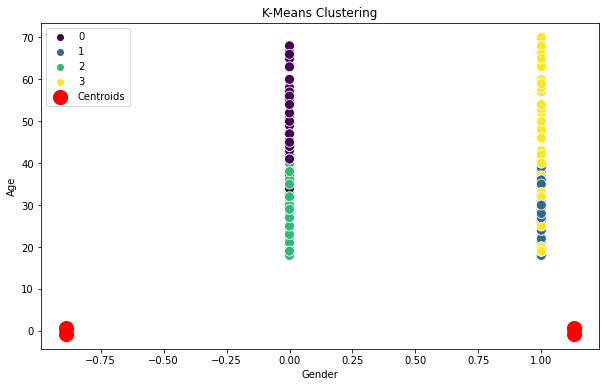

In [41]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Gender', y='Age', hue='Cluster', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend()
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Clustering using hierarchical

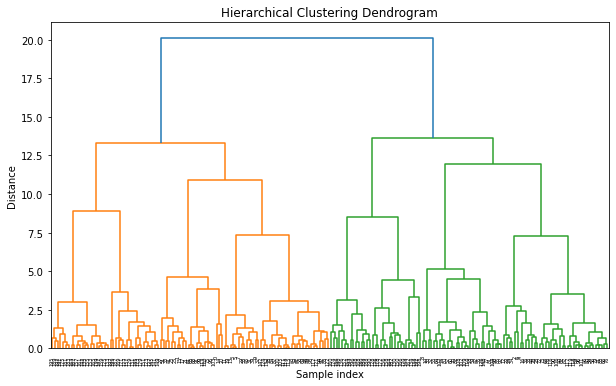

In [43]:
# Create the linkage matrix
Z = linkage(scaled_features, method='ward')  # Ward minimizes the variance of merged clusters

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [44]:
# Apply Agglomerative Clustering with the chosen number of clusters (e.g., 4)
optimal_clusters = 4
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
df['Cluster'] = hierarchical.fit_predict(scaled_features)

# Display the first few rows with clusters assigned
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1   19                  15                      39        1
1       1   21                  15                      81        1
2       0   20                  16                       6        0
3       0   23                  16                      77        1
4       0   31                  17                      40        0


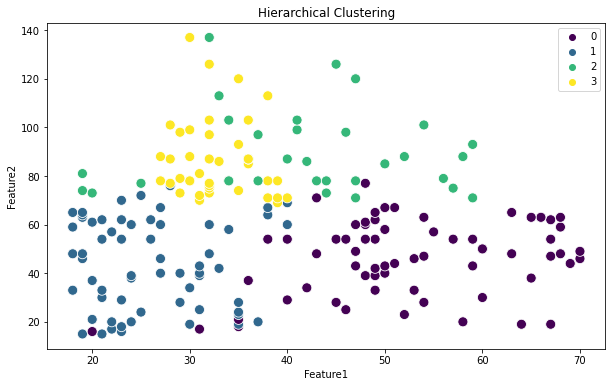

In [45]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Cluster', palette='viridis', s=100)
plt.title('Hierarchical Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()